In [1]:
import os
import argparse
import time
from datetime import datetime, date
import random

import numpy as np
from scipy.sparse import load_npz
from scipy.stats import pearsonr
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import pandas as pd

import torch
import torch_geometric
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from scipy.stats import linregress

from model_classes_ import GCN_classification, GCN_regression, MLP_Classification, MLP_Regression, CNN
from custom_funcs import experiment_n

In [2]:
torch.cuda.empty_cache()

In [3]:
# Check for GPU
print(torch.cuda.is_available())  # True/False
print(torch.cuda.device_count())  # Number of GPUs available
print(torch.cuda.current_device())  # Current GPU ID (e.g., `0`)
print(torch.cuda.get_device_name(0))  # GPU name

True
1
0
NVIDIA RTX A5000


In [4]:
# Hyperparameters
chip_res = 10000
hic_res = 10000
num_hm = 6
num_feat = int((hic_res/chip_res)*num_hm)
regression_flag = 0
max_epoch = 50
learning_rate = 0.001
num_lin_layers = 2
lin_hidden_size = 100
num_graph_conv_layers = 2
graph_conv_embed_size = 256
num_runs = 10
graph_conv_layer_sizes = [num_feat] + \
        [int(max(graph_conv_embed_size, lin_hidden_size)) \
              for i in np.arange(1, num_graph_conv_layers, 1)] + [lin_hidden_size]

lin_hidden_sizes_r = [graph_conv_layer_sizes[-1]] + \
        [int(max(lin_hidden_size, 1)) \
              for i in np.arange(1, num_lin_layers, 1)] + [1]
lin_hidden_sizes_c = [graph_conv_layer_sizes[-1]] + \
        [int(max(lin_hidden_size, 2)) \
              for i in np.arange(1, num_lin_layers, 1)] + [2]

In [5]:
# Stores AUROC and PCC across all models for each cell line
E116 = {'name': 'E116', 'AUROC': None, 'PCC': None}
E122 = {'name': 'E122', 'AUROC': None, 'PCC': None}
E123 = {'name': 'E123', 'AUROC': None, 'PCC': None}

In [6]:
device='cuda'
for cell_line in [E116, E122, E123]:
        print(f"Cell line: {cell_line['name']}")
        experiment_n(
            cell_line, 
            num_runs, 
            GCN_classification(num_feat, num_graph_conv_layers, graph_conv_layer_sizes, num_lin_layers, lin_hidden_sizes_c, 2),
            GCN_regression(num_feat, num_graph_conv_layers, graph_conv_layer_sizes, num_lin_layers, lin_hidden_sizes_r, 1),
            'GCN', 
            max_epoch=max_epoch,
            device=device
        )

Cell line: E116
Classification Task...
Iteration 1:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:07
Performance:
Test AUROC: 0.9012264843974576 

Iteration 2:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:05
Performance:
Test AUROC: 0.9134348622820084 

Iteration 3:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:05
Performance:
Test AUROC: 0.9117877112822315 

Iteration 4:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:05
Performance:
Test AUROC: 0.9137673739426788 

Iteration 5:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:05
Performance:
Test AUROC: 0.8989397868049553 

Iteration 6:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9146184528936466 

Iteration 7:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9136784950014373 

Iteration 8:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9155369568702902 

Iteration 9:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9183395662506817 

Iteration 10:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:05
Performance:
Test AUROC: 0.9157807944874703 

Regression Task...
Iteration 1:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7330846729622997 

Iteration 2:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7642608406436618 

Iteration 3:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:15
Performance:
Test pearson: 0.7754899622744905 

Iteration 4:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:16
Performance:
Test pearson: 0.7610386393135474 

Iteration 5:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:15
Performance:
Test pearson: 0.7534547095813321 

Iteration 6:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.783951951877163 

Iteration 7:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7837828540459141 

Iteration 8:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7835392190644261 

Iteration 9:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7840770524864612 

Iteration 10:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.788457649002357 

Cell line: E122
Classification Task...
Iteration 1:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.8798916068926242 

Iteration 2:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.8960843431238601 

Iteration 3:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9077480714739034 

Iteration 4:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.8950129873453353 

Iteration 5:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9081086916803693 

Iteration 6:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9067314417375983 

Iteration 7:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9025549304921829 

Iteration 8:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9028376841587606 

Iteration 9:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9138932829593681 

Iteration 10:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.916418602083871 

Regression Task...
Iteration 1:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.6834946823206376 

Iteration 2:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.719352180516028 

Iteration 3:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7483823588735321 

Iteration 4:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7395527854616859 

Iteration 5:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:14
Performance:
Test pearson: 0.7640434177603749 

Iteration 6:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7415276491710533 

Iteration 7:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:14
Performance:
Test pearson: 0.7559100914126392 

Iteration 8:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:15
Performance:
Test pearson: 0.7614658099341942 

Iteration 9:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7644779809286762 

Iteration 10:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:14
Performance:
Test pearson: 0.7632971199085055 

Cell line: E123
Classification Task...
Iteration 1:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9250518231010662 

Iteration 2:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9126069726881376 

Iteration 3:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9211969895824791 

Iteration 4:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9175214890172937 

Iteration 5:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9277885742459151 

Iteration 6:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9326633859878867 

Iteration 7:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9218105596736066 

Iteration 8:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:05
Performance:
Test AUROC: 0.9331074299606434 

Iteration 9:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9367944879908947 

Iteration 10:


Epoch 0 out of 50


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  partial_metrics['Classification'].replace(to_replace=0, value='TN', inplace=True)
/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:493: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

Elapsed time: 00:00:04
Performance:
Test AUROC: 0.9340336336606035 

Regression Task...
Iteration 1:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7285831360040878 

Iteration 2:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7755124913143691 

Iteration 3:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7904651285804472 

Iteration 4:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7889209354198685 

Iteration 5:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.7976172918314275 

Iteration 6:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:14
Performance:
Test pearson: 0.799634854496995 

Iteration 7:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.8141930864749783 

Iteration 8:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:14
Performance:
Test pearson: 0.8033142542582 

Iteration 9:


Epoch 0 out of 75


/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


Elapsed time: 00:00:13
Performance:
Test pearson: 0.790359479666718 

Iteration 10:


Epoch 0 out of 75
Elapsed time: 00:00:14
Performance:
Test pearson: 0.7937730138230432 



/home/apimple/DSC180A-FA24-project-group/dsc180a/src/custom_funcs.py:553: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_full_metrics = pd.concat([df_full_metrics, partial_metrics], ignore_index=True)


In [7]:
print(f"E116:{E116}")
print(f"E122:{E122}")
print(f"E123:{E123}")

E116:{'name': 'E116', 'AUROC': (0.9117110484212858, 0.00606381559781273), 'PCC': (0.7711137551251653, 0.016953612638327377), 'PCC_test': array([0.16256441, 0.13893394, 0.8046164 , ..., 0.7909885 , 1.7091173 ,
       0.        ], dtype=float32), 'PCC_pred': array([0.2855886 , 0.20845576, 0.33162475, ..., 0.51809305, 1.1311663 ,
       0.06133502], dtype=float32)}
E122:{'name': 'E122', 'AUROC': (0.9029281641947874, 0.01003532963591568), 'PCC': (0.7441504076287326, 0.02440009730026713), 'PCC_test': array([1.2327167 , 0.6620019 , 0.        , ..., 1.5458264 , 1.225826  ,
       0.00860017], dtype=float32), 'PCC_pred': array([0.44444704, 0.86342573, 0.18214026, ..., 1.5037268 , 0.85257846,
       0.18611324], dtype=float32)}
E123:{'name': 'E123', 'AUROC': (0.9262575345908527, 0.0075583725711076445), 'PCC': (0.7882373671870134, 0.022090777003626928), 'PCC_test': array([1.7423245 , 0.71130097, 0.00259798, ..., 1.1055102 , 0.9737742 ,
       0.7704101 ], dtype=float32), 'PCC_pred': array([0.834

In [8]:
with open('results/GCMERGE.csv', 'w') as f:
    f.write('cell_line,auroc_mu,auroc_std,pcc_mu,pcc_std\n')
    f.write(f"E116,{E116['AUROC'][0]},{E116['AUROC'][1]},{E116['PCC'][0]},{E116['PCC'][1]}\n")
    f.write(f"E122,{E122['AUROC'][0]},{E122['AUROC'][1]},{E122['PCC'][0]},{E122['PCC'][1]}\n")
    f.write(f"E123,{E123['AUROC'][0]},{E123['AUROC'][1]},{E123['PCC'][0]},{E123['PCC'][1]}\n")

f.close()

In [9]:
color = '#b3998b'

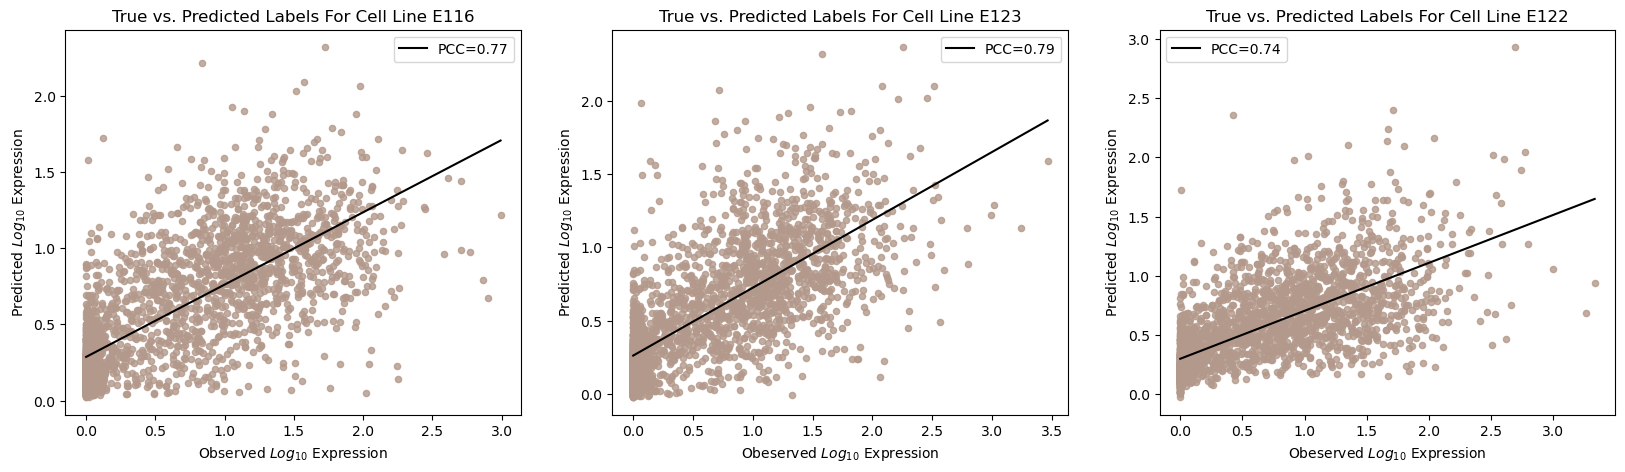

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

# Scatter plot for subplot 1
slope, intercept, _, _, _ = linregress(E116['PCC_test'], E116['PCC_pred'])
x_vals = np.array([min(E116['PCC_test']), max(E116['PCC_test'])])
y_vals = slope * x_vals + intercept

axes[0].scatter(E116['PCC_test'], E116['PCC_pred'], s=20, color=color, alpha=0.8)
axes[0].plot(x_vals, y_vals, color="black", label=f"PCC={np.round(E116['PCC'][0],2)}")
axes[0].set_title("True vs. Predicted Labels For Cell Line E116")
axes[0].set_xlabel("Observed $Log_{10}$ Expression")
axes[0].set_ylabel("Predicted $Log_{10}$ Expression")
axes[0].legend()

slope, intercept, _, _, _ = linregress(E123['PCC_test'], E123['PCC_pred'])
x_vals = np.array([min(E123['PCC_test']), max(E123['PCC_test'])])
y_vals = slope * x_vals + intercept

axes[1].scatter(E123['PCC_test'], E123['PCC_pred'], s=20, color=color, alpha=0.8)
axes[1].plot(x_vals, y_vals, color="black", label=f"PCC={np.round(E123['PCC'][0],2)}")
axes[1].set_title("True vs. Predicted Labels For Cell Line E123")
axes[1].set_xlabel("Obeserved $Log_{10}$ Expression")
axes[1].set_ylabel("Predicted $Log_{10}$ Expression")
axes[1].legend()


slope, intercept, _, _, _ = linregress(E122['PCC_test'], E122['PCC_pred'])
x_vals = np.array([min(E122['PCC_test']), max(E122['PCC_test'])])
y_vals = slope * x_vals + intercept

axes[2].scatter(E122['PCC_test'], E122['PCC_pred'], s=20, color=color, alpha=0.8)
axes[2].plot(x_vals, y_vals, color="black", label=f"PCC={np.round(E122['PCC'][0],2)}")
axes[2].set_title("True vs. Predicted Labels For Cell Line E122")
axes[2].set_xlabel("Obeserved $Log_{10}$ Expression")
axes[2].set_ylabel("Predicted $Log_{10}$ Expression")
axes[2].legend()

plt.savefig('results/pcc_scatter.png')